In [1]:
import matplotlib.pyplot as plt
import random

## TODO
* Read Raw Session Data
* Read Raw Key Data
* Create Key Dictionary
* Process Sessions

## Data Format
\(
>Unique-ID (10 chars)  
>User-ID  
>[Word]  
>[Correct-Flag]  
>[Part-of-Speech]  
>Date  
  
\)

In [2]:
with open("slam-data/es_en.slam.20190204.dev", "r") as f:
    raw_data = f.read()

In [3]:
with open("slam-data/es_en.slam.20190204.dev.key", "r") as f:
    raw_success_data = f.read()

In [4]:
success_key = {}
for x in raw_success_data.split("\n"):
    entry = x.split()
    if len(entry) == 2:
        success_key[entry[0]] = eval(entry[1])

In [5]:
prompts = raw_data.split("# prompt:")[1:] # Removed Promptless session

In [6]:
data = []
for prompt in prompts:
    sessions = prompt[prompt.index("\n"):].split("# user:")

    for session in sessions: 
        if len(session) <= 1:
            continue
        
        
        exercises = session[session.index("\n"):].split("\n") 
        exercises = list(filter(lambda x: len(x) > 0, exercises))
    
        word_tokens = []
        word_flags = []
        word_parts = []
        
        for exercise in exercises:
            exercise_data = exercise.split() 
            
            word_tokens.append(exercise_data[1])
            word_flags.append(success_key[exercise_data[0]])
            word_parts.append(exercise_data[2])
    
        sessionId = exercise[:10]
        userId = session[:session.index("\n")].split()[0] 
        days = session[:session.index("\n")].split()[2] 

        data.append({
            "sessionId": sessionId,
            "userId": userId,
            "words": word_tokens,
            "flags": word_flags,
            "parts": word_parts,
            "day": eval(days[len("days:"):])
        })

## Plots

In [7]:
user_ids = list(set(list(map(lambda x: x["userId"], data))))

In [12]:
import json
with open("user_ids.json", "w") as f:
    json.dump(user_ids, f, indent=2)

In [11]:
diffs = []
for (index, uid) in enumerate(user_ids):
    print(index, end="\r")
    user_day_data = list(
        map(
            lambda x: x["day"],
            filter(
                lambda x: x["userId"] == uid,
                data
            )
        )
    )
    diff = max(user_day_data) - min(user_day_data)
    diffs.append(diff)

KeyboardInterrupt: 

Analysis shows that only data for 10-20 days exist

### Day Position

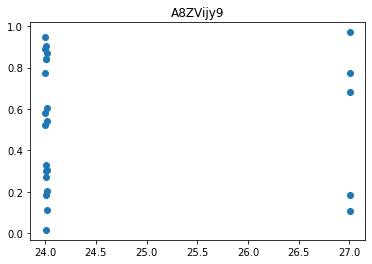

In [13]:
uid = random.choice(user_ids)
# uid = "NM6fsg7V"
user_data = list(filter(lambda x: x["userId"] == uid, data))

fig, ax = plt.subplots()
ax.set_title(uid)
# ax.set_xlim([min(), 30])
ax.scatter(
    list(map(lambda x: x["day"], user_data)),
    [random.random() for _ in range(len(user_data))],
)

In [10]:
#NM6fsg7V

In [11]:
import json
with open("sample-user-data.json", "w") as f:
    json.dump(user_data, f, indent=2)

### Text Testing

Text(0.7, 0.5, 'Bad')

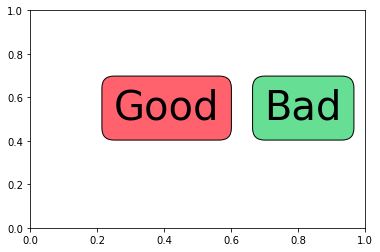

In [54]:
fig, ax = plt.subplots()
ax.text(
    0.25,
    0.5,
    "Good",
    size=40, 
    bbox=dict(
        boxstyle="round",
        fc="#ff616d",
    )
)

ax.text(
    0.7,
    0.5,
    "Bad",
    size=40, 
    bbox=dict(
        boxstyle="round",
        fc="#66de93",
    )
)

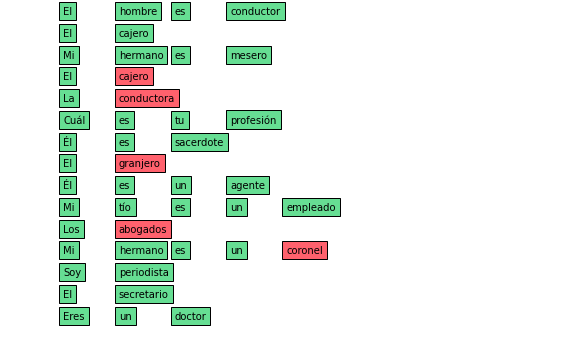

In [141]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_axis_off()
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

y = 10
for sentence in user_data:
#     x = sentence["day"]
    x = 10
    for (index, word) in enumerate(sentence["words"]):
        t = ax.text(
            x,
            y,
            word,
            size=10,
            bbox=dict(
                fc="#66de93" if sentence["flags"][index] == 0 else "#ff616d",
            )
        )
        x += 10
    y += 8